<a href="https://colab.research.google.com/github/CyberPulsate/house_price_model_-/blob/main/Cubix_vizsga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adatok előkészítése, előfeldolgozása

In [130]:
import pandas as pd # Pandas könyvtár importálása: Adatok manipulálására és elemzésére használjuk.
import numpy as np # NumPy könyvtár importálása: Numerikus műveletekhez és matematikai számításokhoz használjuk.
import matplotlib.pyplot as plt # Matplotlib könyvtár importálása: Adatok vizualizálásához, például grafikonok és diagramok készítéséhez használjuk.
import seaborn as sns # Seaborn könyvtár importálása: Fejlettebb vizualizációkhoz és statisztikai grafikonokhoz használjuk, a matplotlib-tel együtt.
# Sklearn könyvtár importálása: Gépi tanulási modellek és adatelőkészítési eszközök használatához.
from sklearn.preprocessing import OneHotEncoder # Kategóriák numerikus reprezentációjára (one-hot encoding) használjuk.
from sklearn.metrics import r2_score, mean_absolute_error # Modellek teljesítményének értékelésére használjuk.
from sklearn.model_selection import train_test_split # Adatok tanulási és tesztelési halmazokra való felosztására használjuk.
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Adatok skálázására, normalizálására használjuk.
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor # Regressziós modellek alkalmazására használjuk.
from sklearn.svm import SVR # Support Vector Regressor (SVR) modell alkalmazására használjuk.
from sklearn.linear_model import Lasso, Ridge # Lineáris regressziós modellek alkalmazására használjuk (Lasso és Ridge regularizációval).
from lightgbm import LGBMRegressor # LightGBM regressziós modell alkalmazására használjuk.
import xgboost as xgb # XGBoost regressziós modell alkalmazására használjuk.
from sklearn.metrics import mean_squared_error, r2_score # Sklearn könyvtár további metrikái: Modellek teljesítményének további értékelésére használjuk.
from sklearn.neighbors import KNeighborsRegressor # K-nearest neighbors regressziós modell alkalmazására használjuk.
%matplotlib inline
# Matplotlib inline parancs: Jupyter Notebookban a grafikont közvetlenül a notebook cellájában jeleníti meg.


In [131]:
#Adatok betöltése
df = pd.read_csv('/content/Housing.csv') #Excel fájl beolvasása

In [132]:
df.info()  # DF Adatok leírása

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [133]:
df.shape  # Sorok és oszlopok száma

(545, 13)

In [134]:
df.describe() #statisztikai összefoglalót nyújt a numerikus oszlopokról

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


A df.describe() függvény a pandas könyvtárban statisztikai összefoglalót nyújt a numerikus oszlopokról egy DataFrame-ben.

count: Az egyes oszlopokban található nem null értékek száma.

mean: Az egyes oszlopok átlagértéke

std: Az egyes oszlopok szórása

min: Az egyes oszlopok minimum értéke

25%: Az egyes oszlopok első kvartilisa (25. percentilis)

50%: Az egyes oszlopok mediánja (50. percentilis)

75%: Az egyes oszlopok harmadik kvartilisa (75. percentilis)

max: Az egyes oszlopok maximum értéke

In [135]:
df.isnull().sum()  # Üres mezők ellenőrzése

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [136]:
df.duplicated().sum()  # Duplikált sorok ellenőrzése

0

In [137]:
df #dataframe kiírása

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


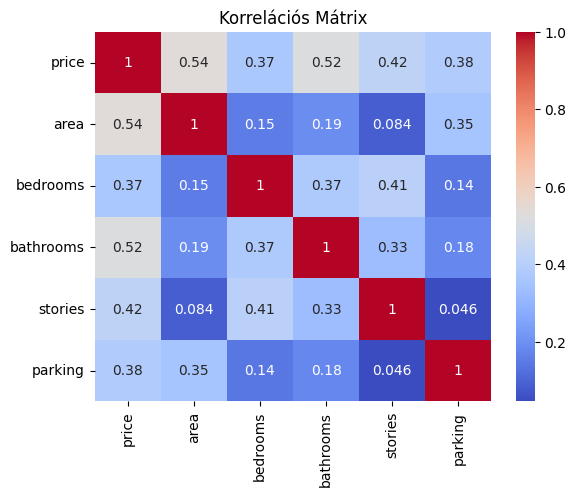

In [138]:
#Korrelációs mátrix
# Numerikus oszlopok kiválasztása
numerikus_df = df.select_dtypes(include=['number'])

# Korreláció számítása és megjelenítése
korrelacio = numerikus_df.corr()
sns.heatmap(korrelacio, annot=True, cmap='coolwarm')
plt.title('Korrelációs Mátrix')
plt.show()

A korrelációs mátrix segít megérteni, hogy az egyes numerikus változók hogyan kapcsolódnak egymáshoz.

1: Tökéletes pozitív korreláció – amikor az egyik változó növekszik, a másik is növekszik.

-1: Tökéletes negatív korreláció – amikor az egyik változó növekszik, a másik csökken.

0: Nincs korreláció – nincs lineáris kapcsolat a két változó között.

In [139]:
data=df.copy()  #dataframe másolása

# Adat vizualizáció

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

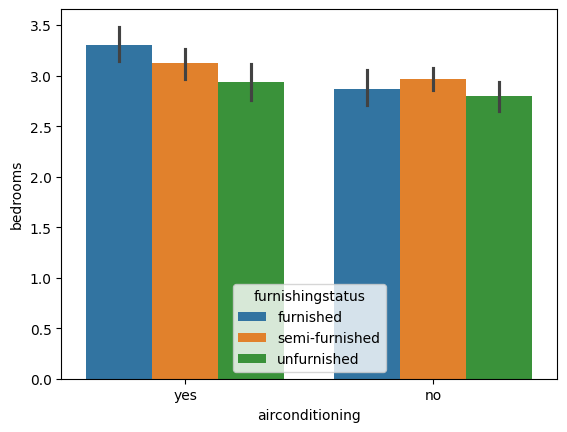

In [140]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])


x=df['airconditioning']: Az x tengely értékeit az airconditioning oszlop adatai alapján állítja be, például "igen" vagy "nem".

y=df['bedrooms']: Az y tengely értékeit a bedrooms oszlop adatai alapján állítja be. Ez az oszlop a hálószobák számát tartalmazza.

hue=df["furnishingstatus"]: A hue paraméter lehetővé teszi, hogy az adatokat színkódolt kategóriák szerint csoportosítsuk. Ebben az esetben a furnishingstatus oszlop (amely a bútorozottság állapotát jelzi) határozza meg a különböző színeket. Ez segít vizuálisan megkülönböztetni a különböző bútorozottsági státuszokat.

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

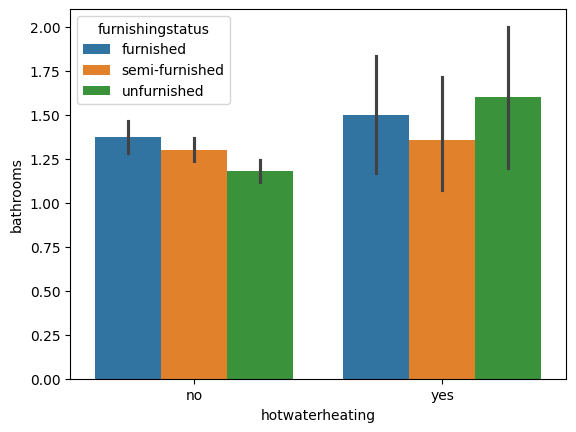

In [141]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms'],hue=df["furnishingstatus"])

x=df['hotwaterheating']: Az x tengely értékeit az hotwaterheating oszlop adatai alapján állítja be. Ez az oszlop a melegvíz-fűtési rendszer állapotát jelzi, például "igen" vagy "nem".

y=df['bathrooms']: Az y tengely értékeit a bathrooms oszlop adatai alapján állítja be. Ez az oszlop a fürdőszobák számát tartalmazza.

hue=df["furnishingstatus"]: A hue paraméter lehetővé teszi, hogy az adatokat színkódolt kategóriák szerint csoportosítsuk. Ebben az esetben a furnishingstatus oszlop (amely a bútorozottság állapotát jelzi) határozza meg a sávok színét. Ez segít vizuálisan elkülöníteni a különböző bútorozottsági státuszokat.

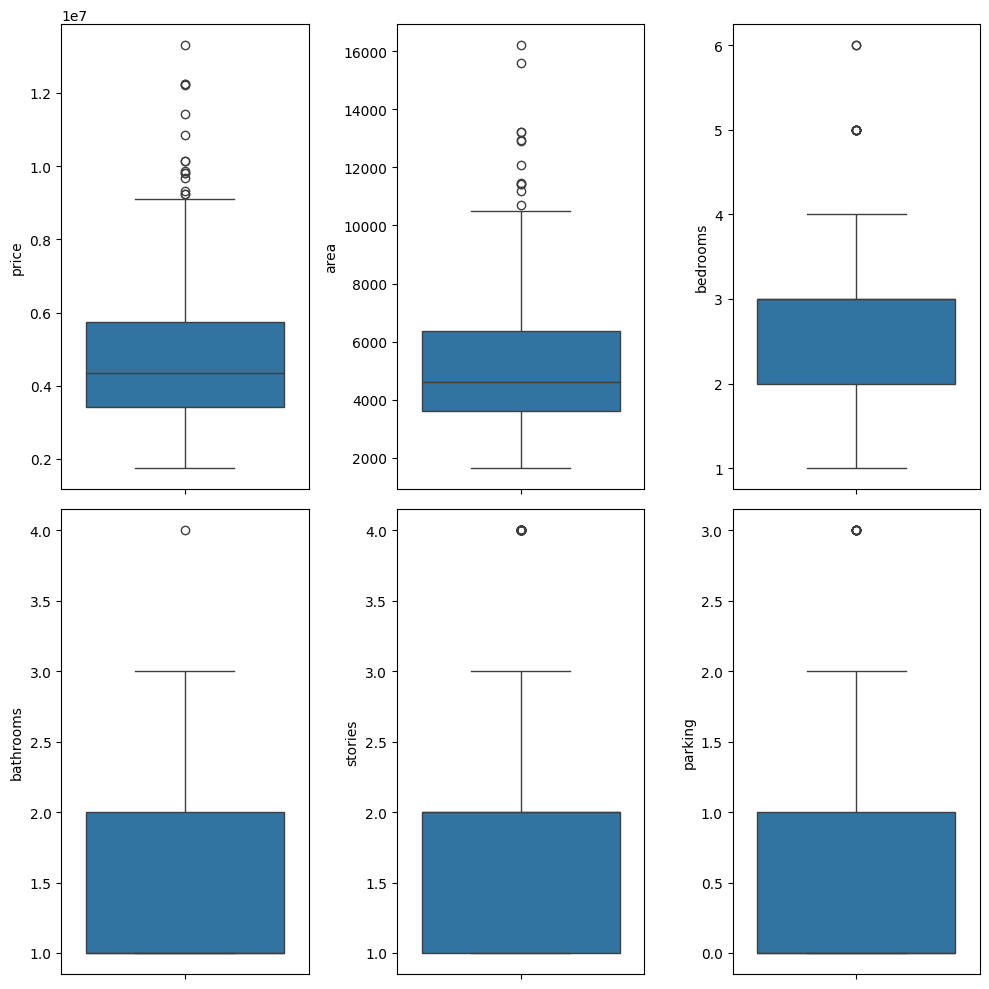

In [142]:
#Több adat vizualizciója
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
sns.boxplot(df['price'], ax=axs[0, 0])
sns.boxplot(df['area'], ax=axs[0, 1])
sns.boxplot(df['bedrooms'], ax=axs[0, 2])
sns.boxplot(df['bathrooms'], ax=axs[1, 0])
sns.boxplot(df['stories'], ax=axs[1, 1])
sns.boxplot(df['parking'], ax=axs[1, 2])
plt.tight_layout()
plt.show()

1. fig, axs = plt.subplots(2, 3, figsize=(10, 10))

plt.subplots: Ez a függvény egy figura (fig) és egy tengelyek (axs) tömböt hoz létre. A 2, 3 paraméterek a subplotok elrendezését jelzik: két sor és három oszlop.

figsize=(10, 10): Beállítja a figura méretét (szélesség, magasság) inch-ben.

2. sns.boxplot(df['price'], ax=axs[0, 0])

sns.boxplot: A Seaborn könyvtár által biztosított dobozplot függvény. A dobozplot egy adat eloszlást vizualizáló eszköz, amely megmutatja az adat középpontját (median), az interkvartilis tartományt (IQR), valamint a kiugró értékeket.

df['price']: Az adathalmaz, amelyet vizualizálni szeretnénk.

ax=axs[0, 0]: Megadja, hogy ez a dobozplot a subplotok első sorának első oszlopába kerül.

3. tight_layout(): Ez a függvény automatikusan beállítja a subplotok elrendezését, hogy ne legyenek átfedések, és minden címke, tengelyelnevezés jól látható legyen.

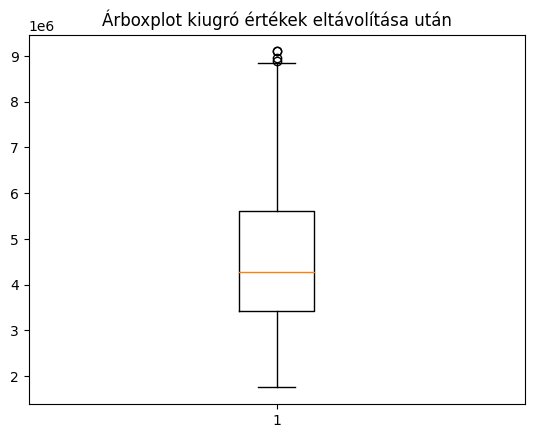

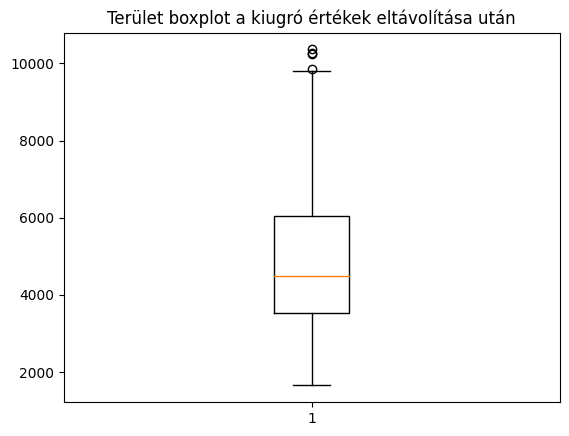

In [143]:
# Kiugró értékek azonosítása és eltávolítása
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

# Vizualizáció
plt.boxplot(df.price)
plt.title('Árboxplot kiugró értékek eltávolítása után')
plt.show()

# Ugyanez az area oszlopra
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

plt.boxplot(df.area)
plt.title('Terület boxplot a kiugró értékek eltávolítása után')
plt.show()

A kiugrók gyakran torzíthatják az elemzéseket és a modellezést. Ezek az adatpontok nem csak statisztikailag rendkívül eltérőek a többi adattól, hanem potenciálisan hibás vagy nem releváns információkat is tartalmazhatnak. Az eltávolításukkal tisztább, megbízhatóbb adatokkal dolgozhatunk.

Q1 (1. kvartilis): Az az érték, amely alá az adatok 25%-a esik.

Q3 (3. kvartilis): Az az érték, amely alá az adatok 75%-a esik.

IQR (Interkvartilis távolság): A Q3 és Q1 közötti távolság, amely az adatok terjedelmét jelzi a középső 50%-ban.

A kiugrók gyakran torzíthatják az elemzéseket és a modellezést. Ezek az adatpontok nem csak statisztikailag rendkívül eltérőek a többi adattól, hanem potenciálisan hibás vagy nem releváns információkat is tartalmazhatnak. Az eltávolításukkal tisztább, megbízhatóbb adatokkal dolgozhatunk.

Q1 (1. kvartilis): Az az érték, amely alá az adatok 25%-a esik.

Q3 (3. kvartilis): Az az érték, amely alá az adatok 75%-a esik.

IQR (Interkvartilis távolság): A Q3 és Q1 közötti távolság, amely az adatok terjedelmét jelzi a középső 50%-ban.

<Axes: xlabel='furnishingstatus', ylabel='price'>

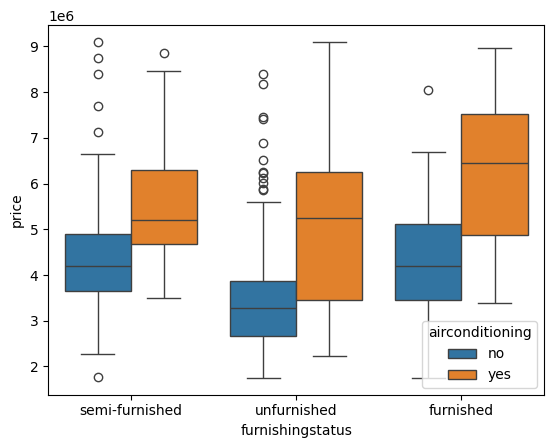

In [144]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

x='furnishingstatus': Az x-tengelyen a furnishingstatus (bútorizáltság állapota) értékei jelennek meg. Ez lehet például "Furnished" (Bútorozott), "Unfurnished" (Bútorozatlan), stb. Ez az oszlop jelöli azokat a kategóriákat, amik szerint az adatok csoportosítva lesznek a boxploton.

y='price': Az y-tengelyen a price (ár) értékei lesznek ábrázolva. Ez azt jelenti, hogy a boxplot a price eloszlását fogja bemutatni a különböző furnishingstatus kategóriák szerint.

hue='airconditioning': A hue paraméter lehetővé teszi a további színkódolást a boxploton belül. Itt az airconditioning (légkondicionáló) oszlop alapján különböző színeket használ az egyes boxplotokban. Ezáltal a boxploton belül meg tudod különböztetni az egyes légkondicionáló típusokat, például "Yes" (Igen) és "No" (Nem).

data=df: A data paraméter megadja, hogy a boxplot az df DataFrame-ből származó adatokat használja.

<ipython-input-145-8349715e9da6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bathrooms"],hist=False)
<ipython-input-145-8349715e9da6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bedrooms"],hist=False)


<Axes: xlabel='bedrooms', ylabel='Density'>

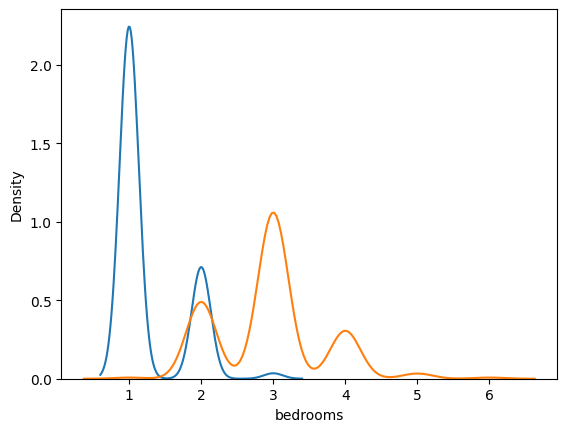

In [145]:
sns.distplot(df["bathrooms"],hist=False)
sns.distplot(df["bedrooms"],hist=False)

distplot lehetővé teszi, hogy hisztogramot és KDE (Kernel Density Estimate) plotot készíts

<Axes: xlabel='area', ylabel='price'>

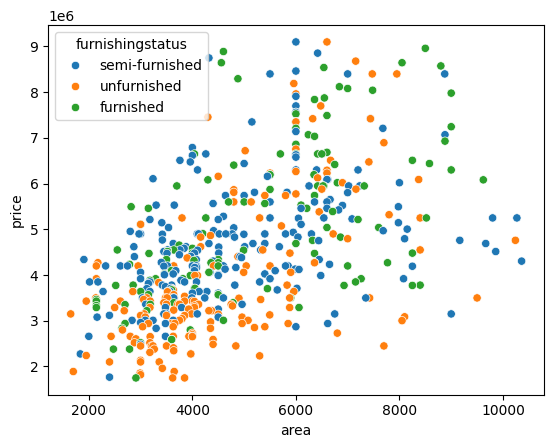

In [146]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

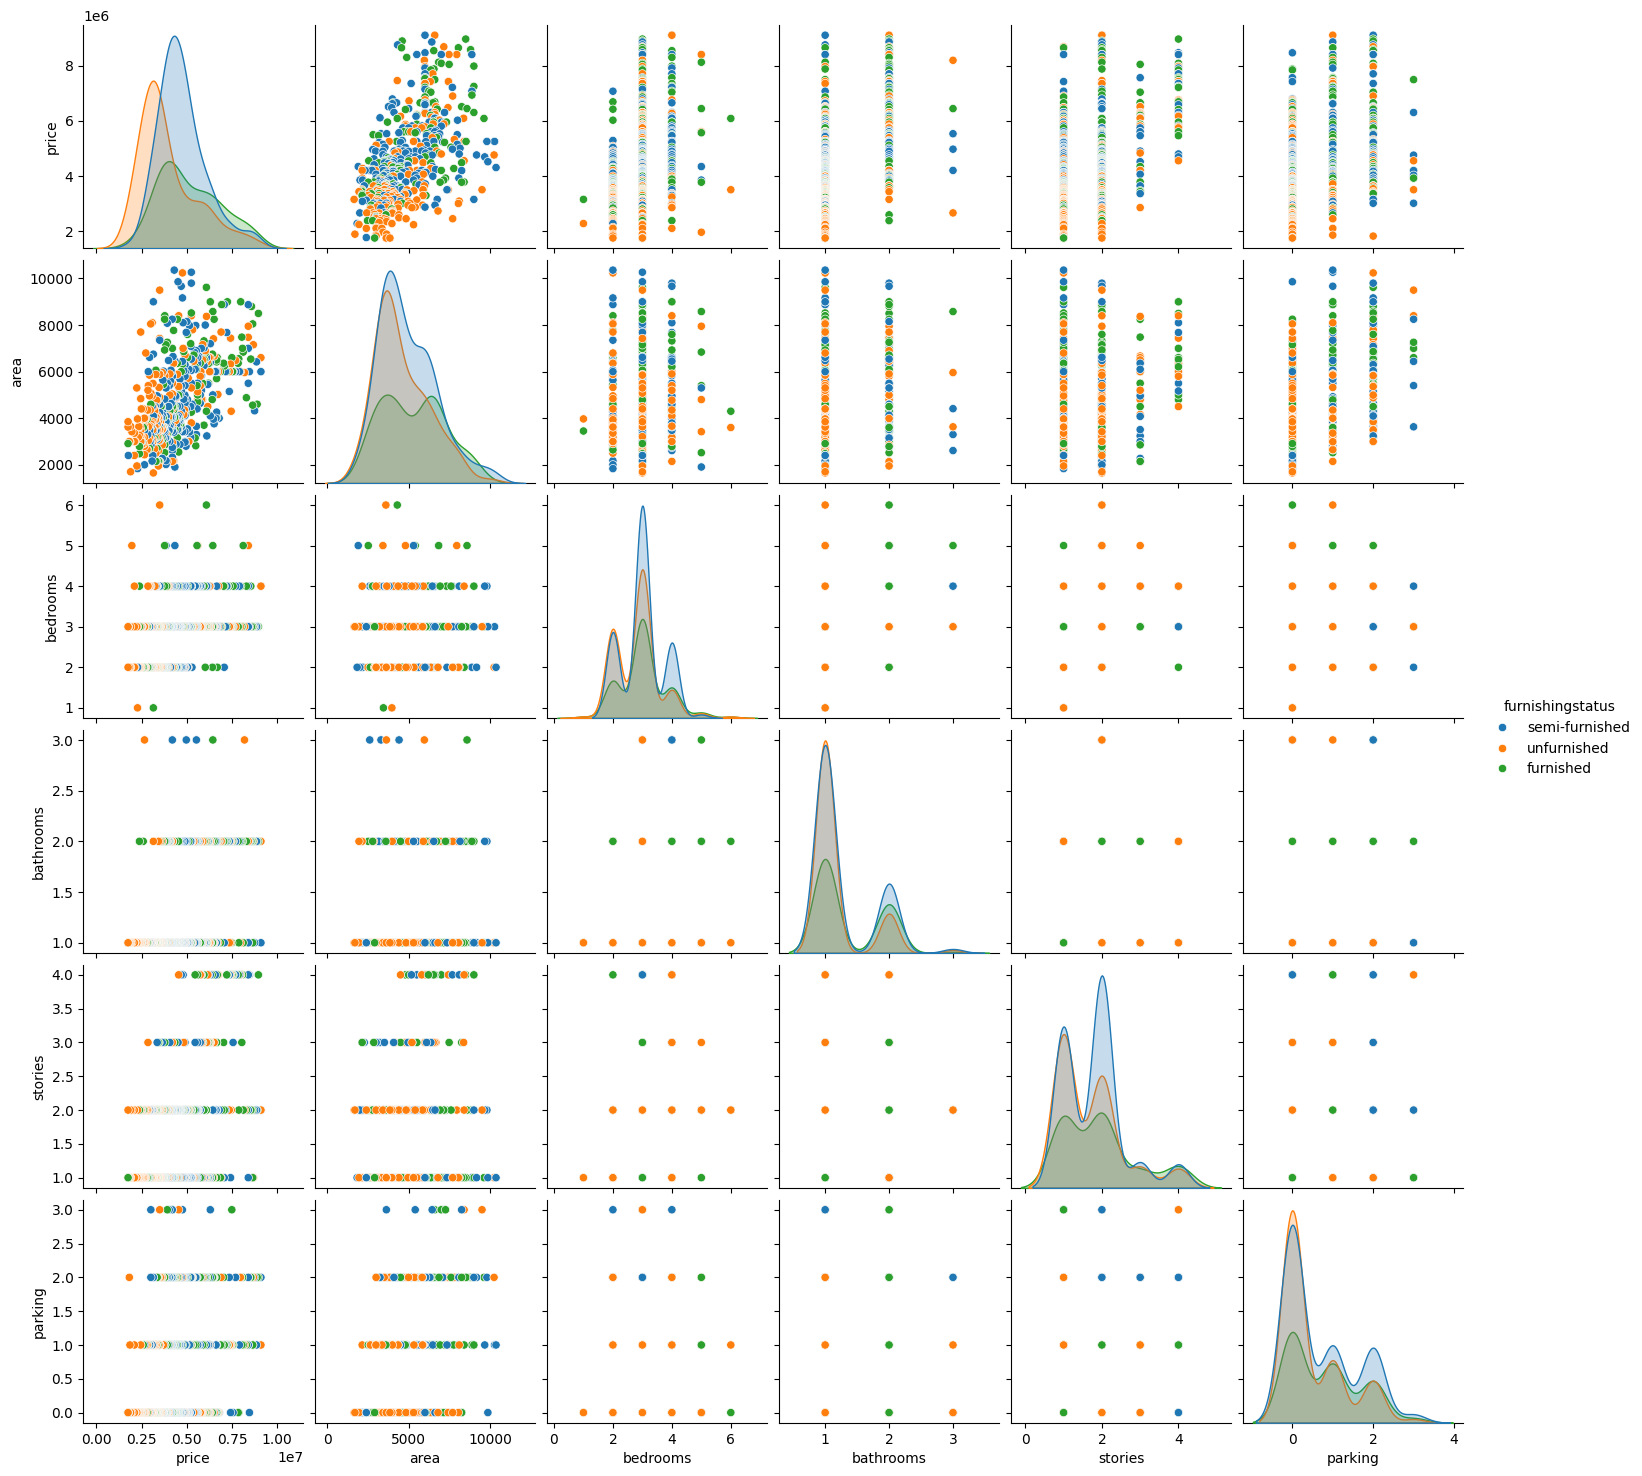

In [147]:
sns.pairplot(df,hue="furnishingstatus")

A pairplot minden lehetséges kombinációját megjeleníti az adatok változóinak, azaz az összes változó közötti kétváltozós kapcsolatot.

# ML modell fejlesztés

In [148]:
# Kategóriák bináris kódolása
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True) #pd.get_dummies: Ez a pandas függvény a kategóriákat bináris (0 vagy 1) formátumba alakítja át,
data = pd.concat([data, status], axis = 1) # Ez a pandas függvény az status DataFrame-et az eredeti data DataFrame-hez hozzáfűzi az oszlopok mentén (axis=1). Más szóval, az új bináris oszlopok hozzáadódnak az eredeti DataFrame-hez.
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True) #Ez a függvény eltávolítja a kategória oszlopokat az eredeti DataFrame-ből. Az axis=1 azt jelzi, hogy az oszlopokat szeretnénk eltávolítani, nem a sorokat. Az inplace=True azt jelenti, hogy az eltávolítás az eredeti DataFrame-en történik, nem hoz létre új másolatot.

data.head() #adat kiírása

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,False,False,True,False,False,False,True,True
1,12250000,8960,4,4,4,3,False,False,True,False,False,False,True,False
2,12250000,9960,3,2,2,2,True,False,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,False,False,True,False,True,False,True,True
4,11410000,7420,4,1,2,2,False,False,True,True,True,False,True,False


Adatok előkészítése és skálázása

In [149]:
# Jellemzők és célváltozó elkülönítése
X = data.drop(['price'], axis=1)
y = data['price']

# Adatok felosztása tanuló és tesztelő készletekre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [150]:
# Skálázó inicializálása és alkalmazása
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training

In [151]:
!pip install catboost
import catboost
from catboost import CatBoostRegressor
# Modellek inicializálása
model = {
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boost Regressor': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'XGRF Regressor': xgb.XGBRFRegressor(),
    'Support Vector Regressor': SVR(),
    'Lasso Reg': Lasso(),
    'Ridge Reg': Ridge(),
    'LGBM Reg': LGBMRegressor(),
    'Cat Boost': CatBoostRegressor(),
    'k-NN Regressor': KNeighborsRegressor()
}

a kódrészlet többféle regressziós modellt készít elő, és egy CatBoost regresszort is hozzáad a modell listához.

In [152]:
pred = {}
for name, mdl in model.items():
    mdl.fit(X_train_scaled, y_train)
    y_pred = mdl.predict(X_test_scaled)
    pred[name] = y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 381, number of used features: 13
[LightGBM] [Info] Start training from score 4762406.272966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Results for Random Forest Regressor:
Mean Squared Error: 1982725371511.6726
R2 Score: 0.5395854036689544


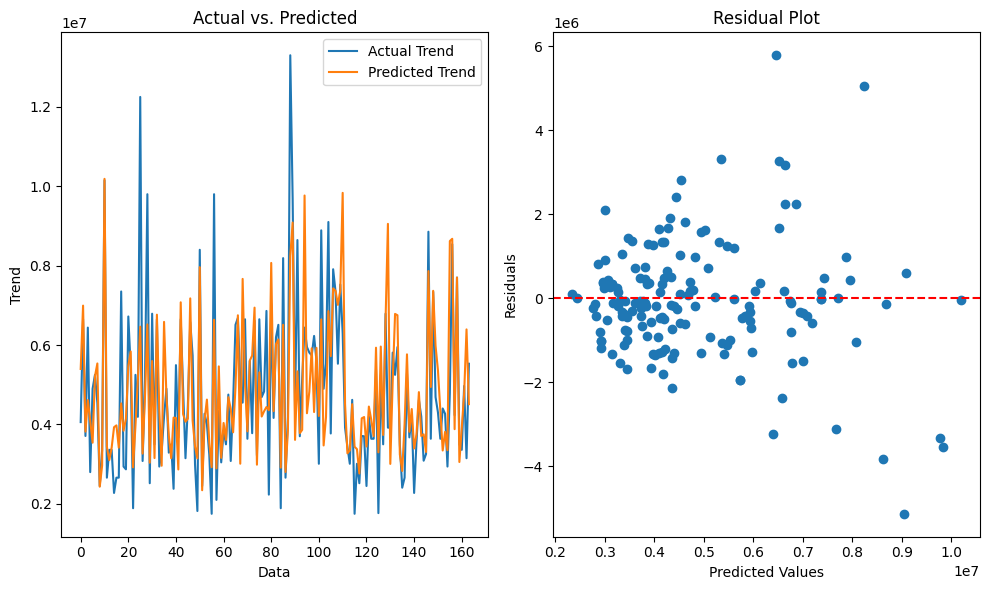

Results for Gradient Boost Regressor:
Mean Squared Error: 1602827073736.9104
R2 Score: 0.6278027251043798


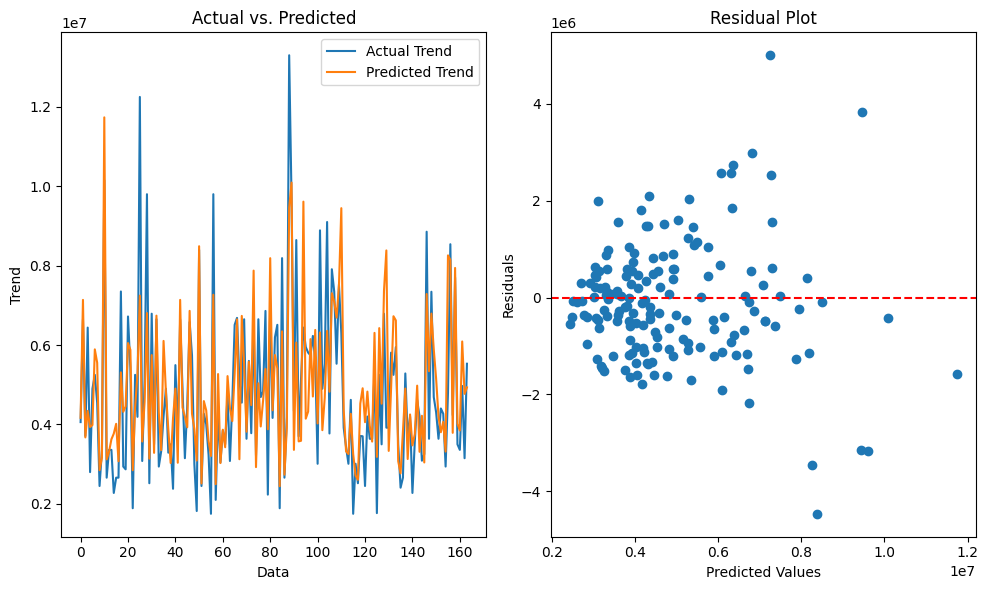

Results for XGBoost:
Mean Squared Error: 2085041665999.2249
R2 Score: 0.5158262305119282


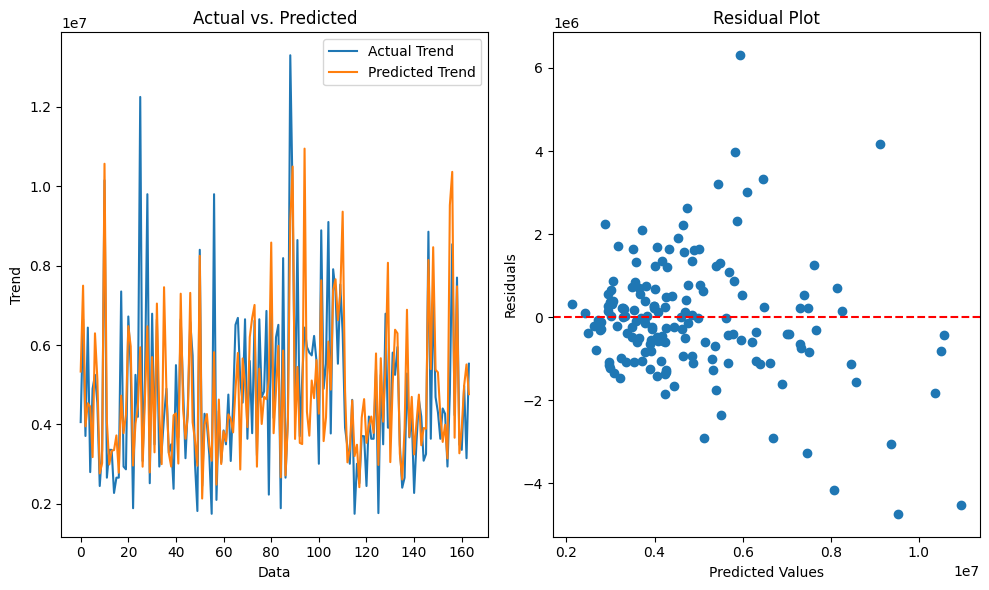

Results for XGRF Regressor:
Mean Squared Error: 2136539810562.3276
R2 Score: 0.5038676921376796


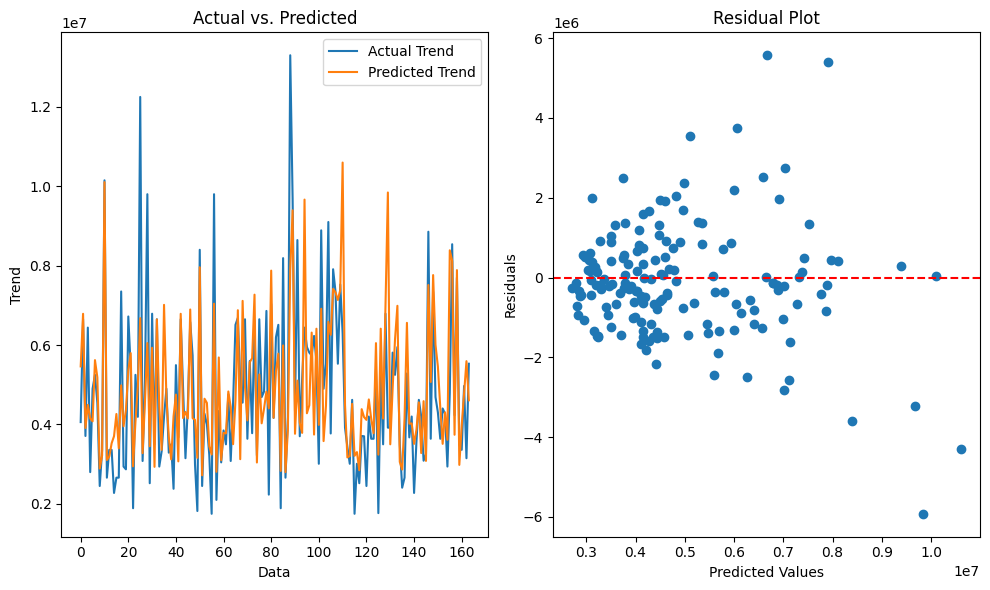

Results for Support Vector Regressor:
Mean Squared Error: 4462190769765.794
R2 Score: -0.03617868189555318


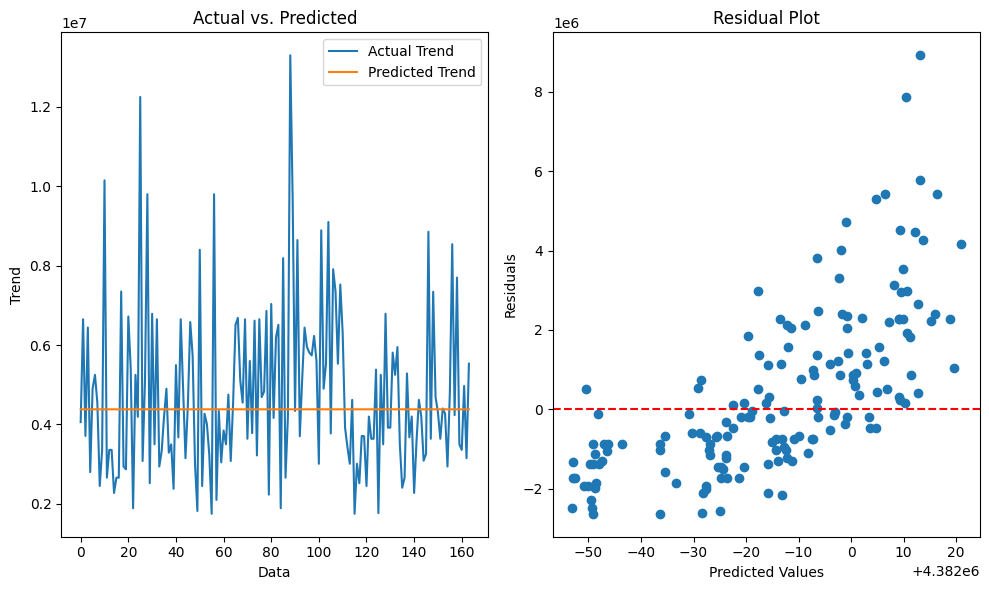

Results for Lasso Reg:
Mean Squared Error: 1523019375413.0706
R2 Score: 0.6463351097380952


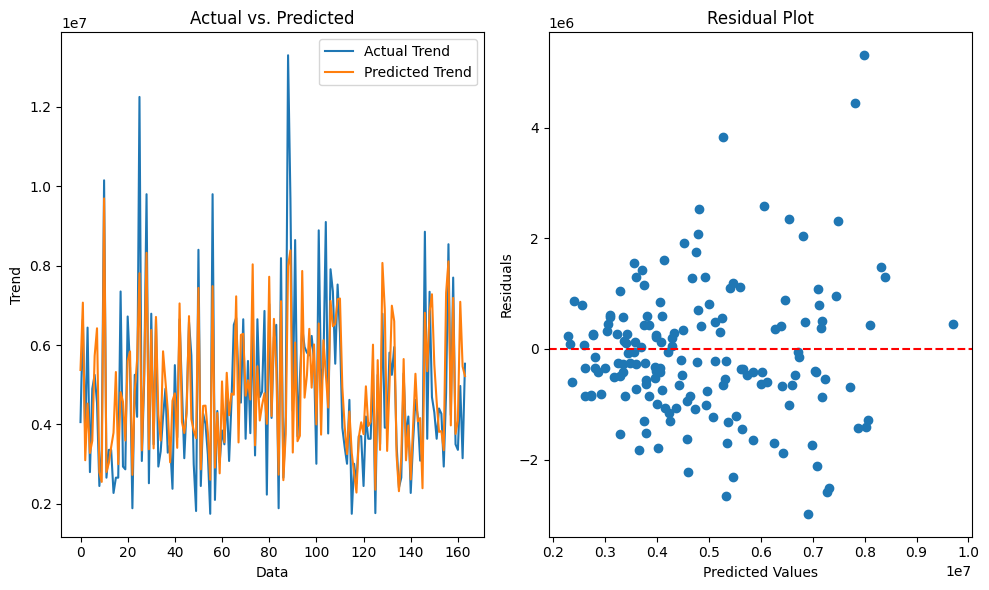

Results for Ridge Reg:
Mean Squared Error: 1507286141893.6582
R2 Score: 0.6499885710111002


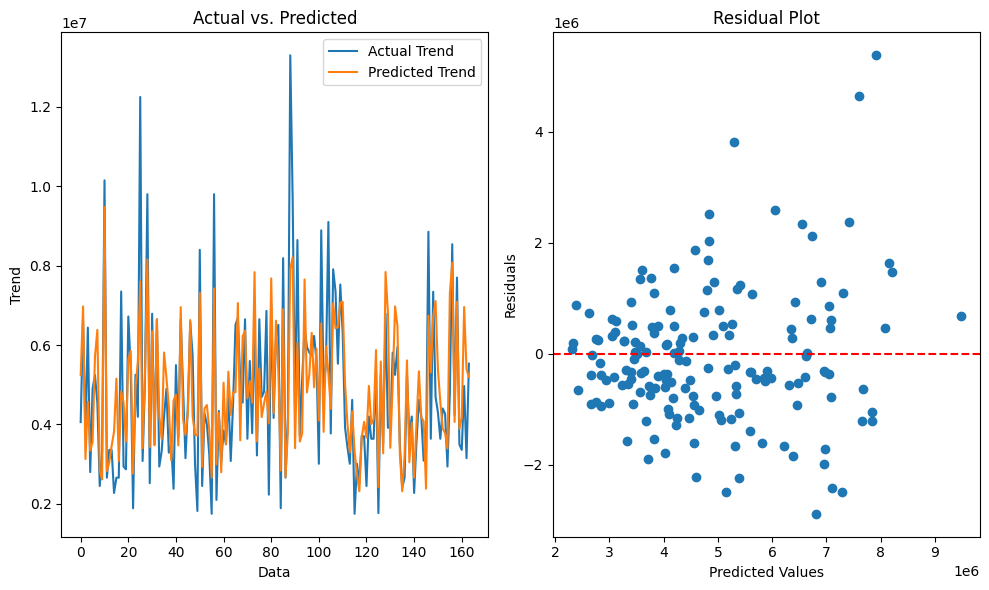

Results for LGBM Reg:
Mean Squared Error: 1602977666834.8694
R2 Score: 0.6277677554301107


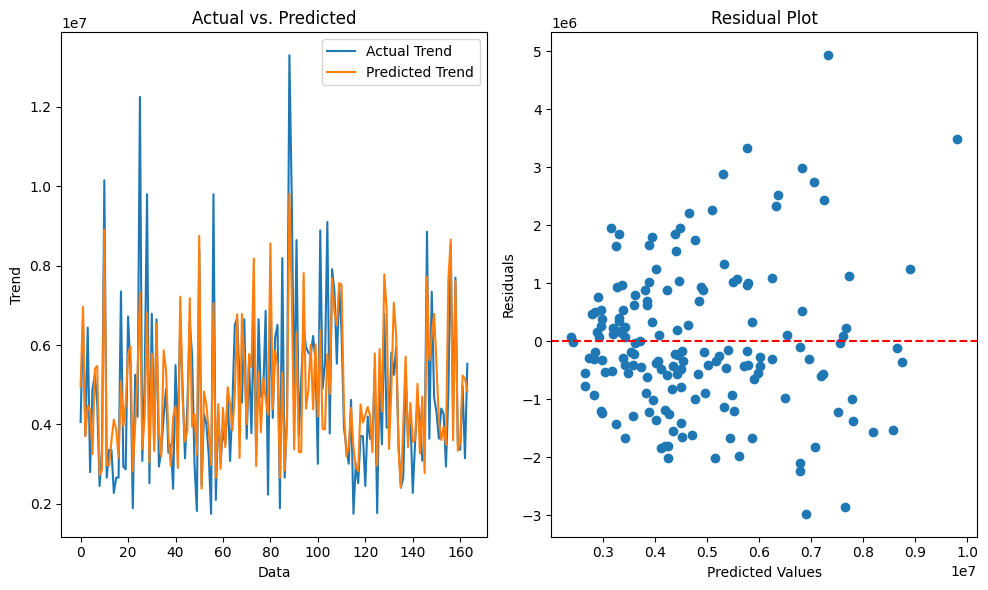

Results for Cat Boost:
Mean Squared Error: 1532351539182.4873
R2 Score: 0.6441680600414872


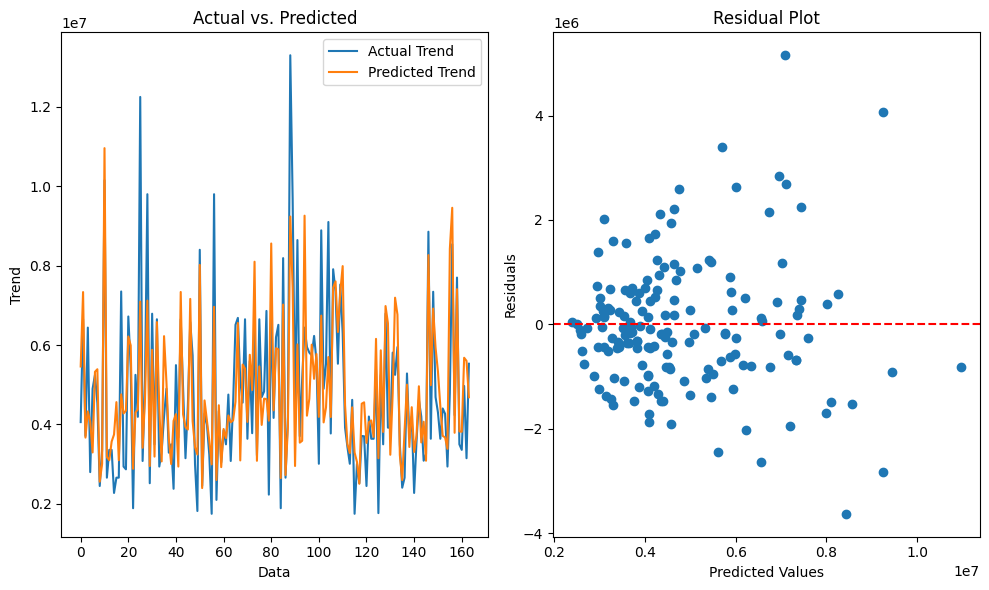

Results for k-NN Regressor:
Mean Squared Error: 2020243885436.8538
R2 Score: 0.5308731171909573


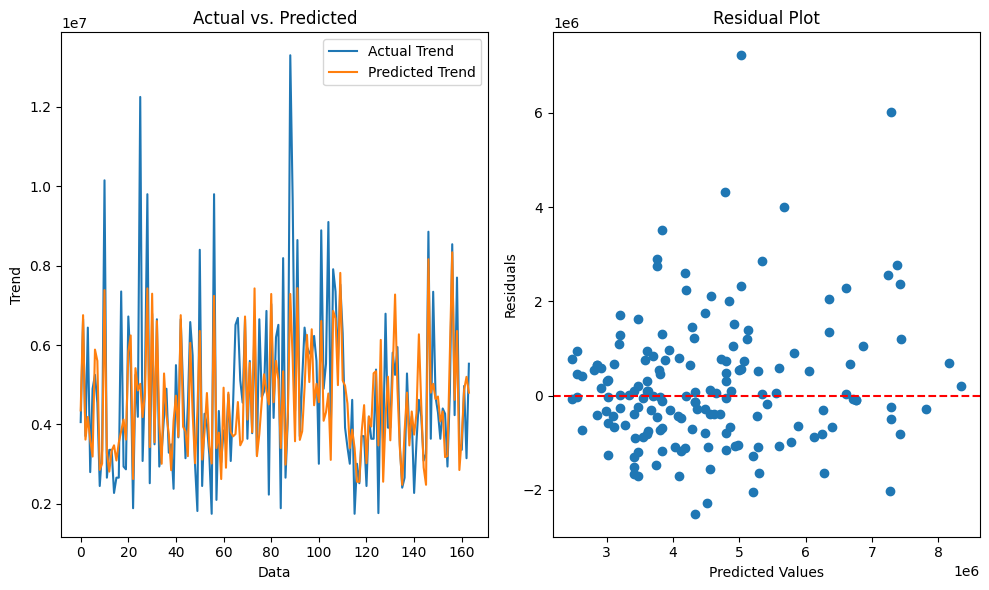

In [153]:
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Results for {name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")

    # Eredmények vizualizálása
    plt.figure(figsize=(10, 6))

    # Valós és előrejelzett értékek
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    # Rezidális ábrák az előrejelzett és a valós értékek közötti különbségeket ábrázolja
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()


Felügyelet nélküli tanulás


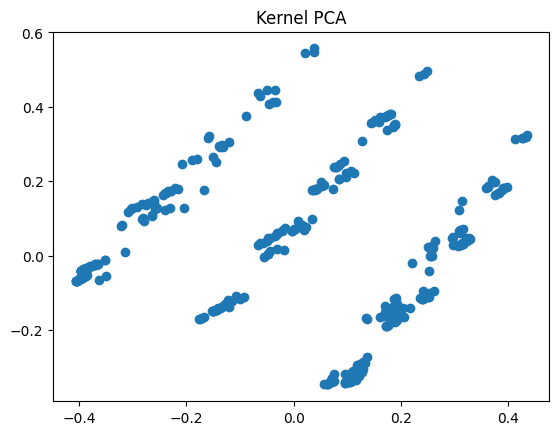

In [154]:
from sklearn.decomposition import KernelPCA

# Kernel PCA alkalmazása
kpca = KernelPCA(kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X_train_scaled)

# Vizualizálás
plt.scatter(X_kpca[:, 0], X_kpca[:, 1])
plt.title('Kernel PCA')
plt.show()

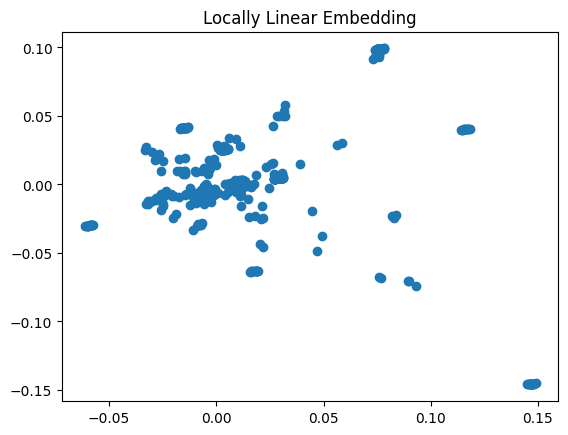

In [155]:
from sklearn.manifold import LocallyLinearEmbedding

# LLE alkalmazása
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X_lle = lle.fit_transform(X_train_scaled)

# Vizualizálás
plt.scatter(X_lle[:, 0], X_lle[:, 1])
plt.title('Locally Linear Embedding')
plt.show()

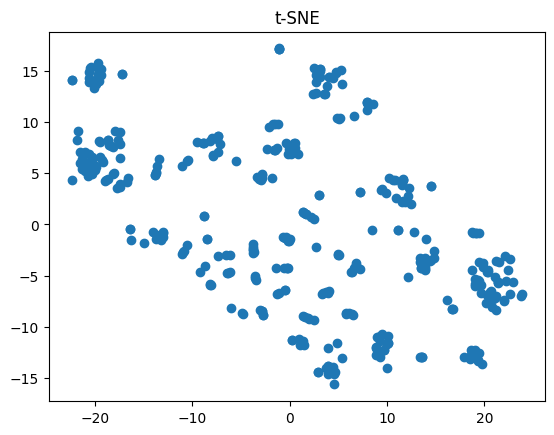

In [156]:
from sklearn.manifold import TSNE

# t-SNE alkalmazása
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)

# Vizualizálás
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


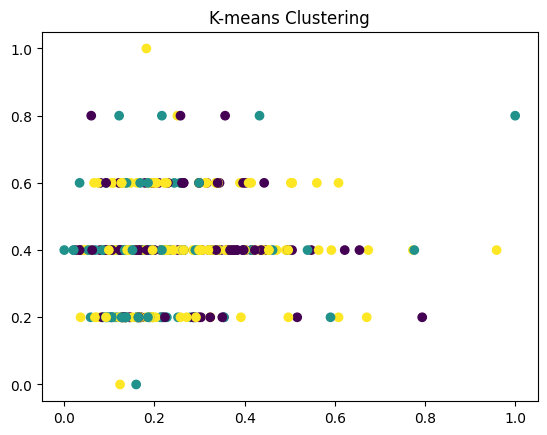

In [157]:
from sklearn.cluster import KMeans

# K-means kluszterezés
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# Vizualizálás
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.show()